In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
estimate = pd.read_csv("Estimar_UH2020.txt", sep = "|")

In [3]:
data = pd.read_csv("Modelar_UH2020.txt", sep = "|")

In [4]:
data.CLASE.unique()

array(['RESIDENTIAL', 'INDUSTRIAL', 'PUBLIC', 'OFFICE', 'OTHER', 'RETAIL',
       'AGRICULTURE'], dtype=object)

In [5]:
data.head(10)

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,...,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
0,35984B9C3E7CD9A1,2207357872,165920300,0.000000e+00,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,...,10951.926645,144.426900,0.557237,0.067249,0.057372,0.853127,2002,0.0,2,RESIDENTIAL
1,F9D04BF6D037F8FB,2189757160,165463267,5.879611e-05,443.899011,627.999060,770.001611,904.999988,1032.998474,1165.001636,...,7048.367637,38.342550,0.709884,0.125156,0.147929,1.181953,1949,1.0,8,RESIDENTIAL
2,B89D5711AFF8C423,2240147335,165690752,0.000000e+00,353.502274,523.003601,644.001831,760.997131,876.999634,1006.997498,...,7013.073271,108.794384,0.517702,0.058268,0.081666,1.401552,1986,1.0,5,RESIDENTIAL
3,1C3478AC1522E7E4,2227146459,165934099,0.000000e+00,268.000613,376.999609,478.003784,575.001233,683.997742,809.005994,...,6216.880538,155.224455,0.450871,0.053591,0.054201,1.011382,1999,1.0,2,RESIDENTIAL
4,4D12AA5009064345,2212350459,165681791,0.000000e+00,318.997910,492.003845,632.999634,757.002197,882.999908,1019.008911,...,7092.767616,1789.873366,0.458819,0.012858,0.019936,1.550478,1966,8.0,6,RESIDENTIAL
5,3E74975BD3F67ADE,2203466180,165762700,0.000000e+00,343.996613,567.010620,745.995483,900.997925,1051.995361,1200.006226,...,8827.104856,104.511247,0.466688,0.070373,0.063454,0.901678,1992,4.0,5,RESIDENTIAL
6,200CB7A318D959DA,2141448290,165496766,0.000000e+00,274.999353,416.001074,561.002997,706.001086,862.001343,1040.000391,...,7285.159019,373.432985,0.251622,0.029647,0.022728,0.766600,1982,1.0,4,RESIDENTIAL
7,80E74C603F31D41C,2212938608,165575238,1.308316e-10,405.999329,561.998108,694.002716,832.001648,969.999817,1115.003906,...,8126.684713,489.776545,0.349491,0.025246,0.028265,1.119589,1952,7.0,4,RESIDENTIAL
8,2FC79F1B7379EC1F,2160794349,165672907,3.997917e-05,396.000687,530.996887,637.001221,735.997009,834.503479,946.001526,...,7122.145471,116.391550,0.523862,0.063012,0.071429,1.133571,1970,1.0,4,RESIDENTIAL
9,A4A6D078FB1079E5,2267210836,165899063,1.098887e-03,454.999338,573.005005,668.002612,752.999573,853.000122,1005.999158,...,5997.459077,333.617230,0.860099,0.046252,0.055740,1.205122,1990,1.0,6,INDUSTRIAL


## Dataset description
Los ficheros contienen un total 55 variables: las 3 primeras de ellas relativas a la identificación de los registros y las 8 últimas variables son distintas referencias geométricas y relativas al entorno (geometría del edificio, métricas geométricas generadas automáticamente -GEOM-, metros cuadrados, año construcción y nº de plantas de los edificios del entorno).


Las imágenes satelitales se han tratado y se ha extraído información de 4 canales (R, G, B y NIR), correspondientes a las bandas de color rojo, verde y azul, y el infrarrojo cercano. El valor mostrado corresponde a la intensidad por deciles en cada imagen. Estas variables empiezan con la letra “Q”.


### Sobre el reto
Los datos representan las características de un grupo de referencias catastrales de la zona de Madrid.  
El objetivo es predecir el uso de cada registro propuesto. Es un problema de clasificación multietiqueta: hay 6 categorías no balanceadas. 
Se presentan 2 conjuntos de datos: “Modelar…” contiene 103.230 registros con 56 variables incluyendo la variable objetivo y “Estimar…” contiene 5.618 registros con 55 variables. 
Se permite el enriquecimiento de datos, siempre y cuando se cumplan que los datos sean públicos, accesibles y legales.

### Las variables 
- La referencia catastral está ofuscada por lo que no es consultable, solo es válida como identificador de registro.  
- La información de longitud-latitud ha sido escalada y desplazada aleatoriamente (manteniendo la relación de posición con el resto de puntos). 
- El principal grupo de variables es información sobre los canales de color R-G-B e infrarrojo de las imágenes tomadas por satélite. Hay 11 variables extraídas de cada uno de estos canales, que representan el valor o densidad en cada decil.  
  - Así, la variable **Q_R_4_0_0** representa el valor para el canal Red en el decil 0, 
  - la variable **Q_G_3_0_8** representa el valor para el canal Green del decil 8 etc. 
  - La identificación “**Q_NIR…**” representa el canal en infrarrojo. 
- A continuación, hay 1 variable de área y 4 variables que condensan información de tipo geométrico sobre la parcela/registro.  
  - El **MAXBUILDINGFLOOR** se refiere a la altura máxima de los registros colindantes, no al propio registro. El año de construcción también se refiere al entorno. 
  - Por último, se presenta una variable categórica representativa de la calidad según los datos de catastro (menor valor, menor calidad). 


### La entrega intermedia 
Se habilita un día **(10 de marzo)** para presentar una “entrega intermedia”, en el que los equipos podrán enviar 2 “ficheros_respuestas” distintos (es decir, la predicción para los registros de “Estimar…”). No hay que enviar script ni presentación.  La Organización, al día siguiente, comunicará la métrica y la posición relativa del equipo en el total de la competición. Este mecanismo es optativo y no será considerado como una entrega oficial evaluable por el jurado local, tan solo será un medio para retroalimentar y mejorar vuestro trabajo. 

## Evaluación: 
#### SE VALORARÁ
- **La calidad y la técnica utilizada para generar un modelo.**
Se analizará la técnica analítica utilizada y se compararán objetivamente los valores reales frente a los valores predichos por el modelo. La métrica para maximizar es la “precisión”.
- **Comunicación.**
Que la documentación interna aportada (códigos, comentarios) esté correctamente expresada y estructurada, y sea reproducible. En la Fase de Presentación de mejores trabajos, el Jurado tendrá en cuenta que el modelado y los resultados obtenidos se transmitan de forma clara y concisa.

In [6]:
# Distribucion de las clases en los datos
d = data[["X","CLASE"]].groupby("CLASE").count()
d/d["X"].sum()*100

,X
CLASE,
AGRICULTURE,0.327424
INDUSTRIAL,4.349511
OFFICE,1.770803
OTHER,1.290323
PUBLIC,2.882883
RESIDENTIAL,87.351545
RETAIL,2.027511


In [11]:
data.describe()

,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,...,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR
count,1.032300e+05,1.032300e+05,1.032300e+05,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,...,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103210.000000
mean,2.208858e+09,1.655955e+08,4.578804e-05,382.633602,548.659095,684.016575,811.053925,939.978002,1080.127592,1242.841586,...,2328.363095,2738.622278,7748.293927,441.123610,0.563343,0.062482,0.061855,1.074327,1972.552436,3.766709
std,2.751723e+07,2.040199e+05,3.168761e-03,99.470870,121.439858,137.763573,153.486424,169.546408,186.422410,206.993926,...,295.852549,365.812714,2795.775635,1869.705189,0.174141,0.042849,0.042295,0.541156,22.335987,2.944896
min,2.120751e+09,1.650957e+08,0.000000e+00,151.000375,184.999420,214.000473,239.999503,269.999451,310.999493,382.999844,...,1861.006226,2172.992676,4085.049076,0.038770,0.000626,0.000679,0.000770,0.015157,1820.000000,0.000000
25%,2.194235e+09,1.654515e+08,0.000000e+00,316.997635,492.003845,632.999634,753.999597,875.008087,1006.997498,1173.999329,...,2126.002441,2478.998193,6051.309064,97.477454,0.455183,0.038255,0.038153,0.801352,1960.000000,1.000000
50%,2.205985e+09,1.655907e+08,0.000000e+00,385.000995,562.997583,698.003998,833.996582,969.999817,1115.001489,1268.997705,...,2313.999268,2688.000000,6798.207198,171.554907,0.536336,0.055802,0.055036,0.997175,1972.000000,4.000000
75%,2.224105e+09,1.657138e+08,5.786675e-07,445.002853,627.001038,770.001611,904.999988,1042.505188,1200.006226,1348.996033,...,2491.004199,2940.996704,8033.479864,343.563671,0.674723,0.078477,0.078064,1.223456,1989.000000,5.000000
max,2.287300e+09,1.665046e+08,1.016050e+00,833.999402,1016.000732,1200.003003,1377.999927,1570.504517,1806.002686,2175.694824,...,3750.997559,4614.998535,15848.608811,238058.952253,1.000000,1.785714,2.631579,68.812431,2017.000000,25.000000


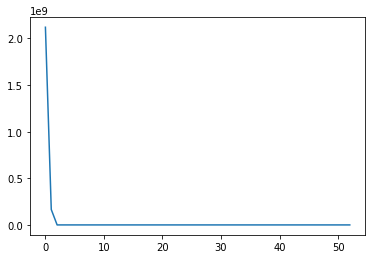

In [12]:
plt.plot(data.describe().T["min"].values)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train, test = train_test_split(data, train_size = 0.8, random_state = 42)

In [9]:
train.head()

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,...,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
83556,A6A904AE7D8A396A,2193271296,165796688,0.000000e+00,325.001498,513.997632,659.003906,794.994531,920.503754,1056.002026,...,6249.828995,73.068000,0.955487,0.165289,0.079114,0.478639,1992,1.0,4,RESIDENTIAL
2308,5A46C2BA75C7F61F,2124812547,166218714,3.362444e-06,241.999710,300.999921,351.000003,404.998975,460.999176,528.997900,...,5366.811726,100.097225,0.345983,0.087481,0.039511,0.451649,2000,1.0,4,RESIDENTIAL
53181,504199BA32EDB5DA,2210004677,165459909,0.000000e+00,417.702170,600.004883,740.001239,865.007849,983.005768,1115.001489,...,6497.804020,67.784900,0.481206,0.082988,0.085543,1.030796,2004,6.0,4,INDUSTRIAL
93021,B735B932C2E3AEE0,2186575950,165510686,0.000000e+00,272.000000,415.999481,570.500244,726.998474,886.998840,1048.999268,...,9671.928455,104.562275,0.350678,0.032030,0.104707,3.268991,1964,5.0,6,RESIDENTIAL
40335,4D2D8ACCE6BEADA4,2266981571,165310803,4.509644e-07,562.000458,720.999756,822.001953,913.001221,1024.999084,1164.000244,...,6604.024144,363.997237,0.451028,0.041596,0.029789,0.716130,1983,2.0,6,RESIDENTIAL


In [10]:
rgbnir_cols = train.columns.str.contains("Q_")
rgbnir = train.iloc[:,rgbnir_cols]
#We normalize the data in all channels
rgbnir = (rgbnir - rgbnir.mean())/rgbnir.std()

In [20]:
def extract_channels(df):
    channels = ["Q_R","Q_G","Q_B","Q_NIR"]
    channel_dfs = []
    for c in channels:
        col_filter = df.columns.str.contains(c)
        channel_dfs.append(df[df.columns[col_filter]])
    return channel_dfs

In [21]:
df_r, df_g, df_b, df_nir = extract_channels(data)

In [12]:
df_r, df_g, df_b, df_nir = extract_channels(rgbnir)

In [13]:
df_r.head()

,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,Q_R_4_0_8,Q_R_4_0_9,Q_R_4_1_0
83556,-0.013597,-0.578520,-0.284359,-0.180257,-0.103295,-0.113314,-0.127678,-0.166347,-0.181771,-0.144586,-0.421158
2308,-0.012648,-1.411366,-2.033041,-2.408362,-2.635264,-2.813816,-2.944804,-3.021089,-3.030283,-3.065501,-1.056982
53181,-0.013597,0.351645,0.421749,0.405679,0.351252,0.254009,0.187707,0.127327,0.068702,0.041729,-0.180231
93021,-0.013597,-1.110341,-1.088910,-0.820494,-0.544746,-0.310222,-0.165111,-0.113406,-0.130813,-0.195287,0.560702
40335,-0.013470,1.799545,1.415100,0.998874,0.662840,0.500803,0.449632,0.454673,0.569622,0.756470,-0.226671


In [126]:
example = pd.DataFrame(np.array([np.arange(10), np.arange(10,20)]).T)

In [129]:
(example - example.values.mean())/example.values.std()

,0,1
0,-1.647509,0.086711
1,-1.474087,0.260133
2,-1.300665,0.433555
3,-1.127243,0.606977
4,-0.953821,0.780399
5,-0.780399,0.953821
6,-0.606977,1.127243
7,-0.433555,1.300665
8,-0.260133,1.474087
9,-0.086711,1.647509


In [87]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [150]:

def f(x):
    fig, ((ax1, ax2), (ax3, ax4))  = plt.subplots(2,2,figsize=(20,10))
    ax1.set_title("R channel")
    ax2.set_title("G channel")
    ax3.set_title("B channel")
    ax4.set_title("NIR channel")
    ax1.plot(df_r.iloc[x], color = "red")
    ax2.plot(df_g.iloc[x], color = "green")
    ax3.plot(df_b.iloc[x], color = "blue")
    ax4.plot(df_nir.iloc[x], color = "brown")
    
interact(f, x=20);

interactive(children=(IntSlider(value=20, description='x', max=60, min=-20), Output()), _dom_classes=('widget-…

In [154]:
train_normalized = train.copy()
train_normalized.iloc[:,rgbnir_cols] = rgbnir

In [162]:
rgbnir_cols_clase = rgbnir_cols.copy()
rgbnir_cols_clase[-1] = True

In [168]:
group = train_normalized.iloc[:,rgbnir_cols_clase]
class_mean = group.groupby("CLASE").mean()

In [196]:
def plot_channels(index, data):
    r, g, b, nir = extract_channels(data)
    fig, ((ax1, ax2), (ax3, ax4))  = plt.subplots(2,2,figsize=(20,10))
    fig.suptitle("Mean of channels for " + index)
    ax1.set_title("R channel")
    ax2.set_title("G channel")
    ax3.set_title("B channel")
    ax4.set_title("NIR channel")
    ax1.plot(r.filter(like = index, axis = 0).iloc[0], color = "red")
    ax2.plot(g.filter(like = index, axis = 0).iloc[0], color = "green")
    ax3.plot(b.filter(like = index, axis = 0).iloc[0], color = "blue")
    ax4.plot(nir.filter(like = index, axis = 0).iloc[0], color = "brown")

In [175]:
indices = class_mean.index.values

array(['AGRICULTURE', 'INDUSTRIAL', 'OFFICE', 'OTHER', 'PUBLIC',
       'RESIDENTIAL', 'RETAIL'], dtype=object)

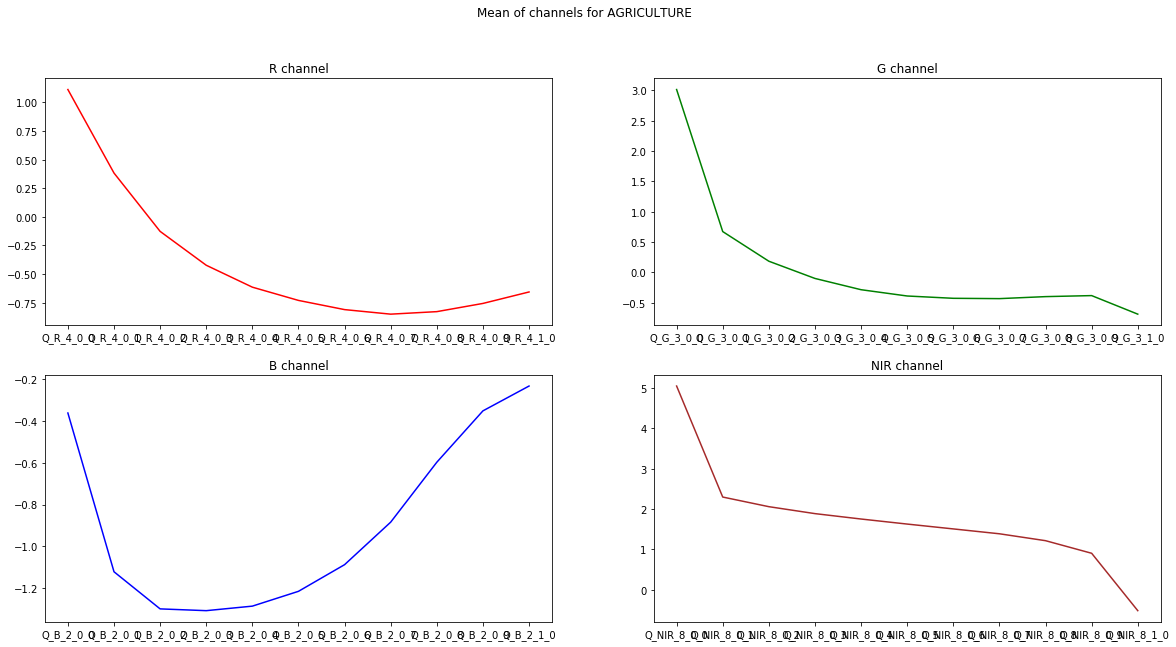

In [198]:
plot_channels("AGRICULTURE", class_mean)

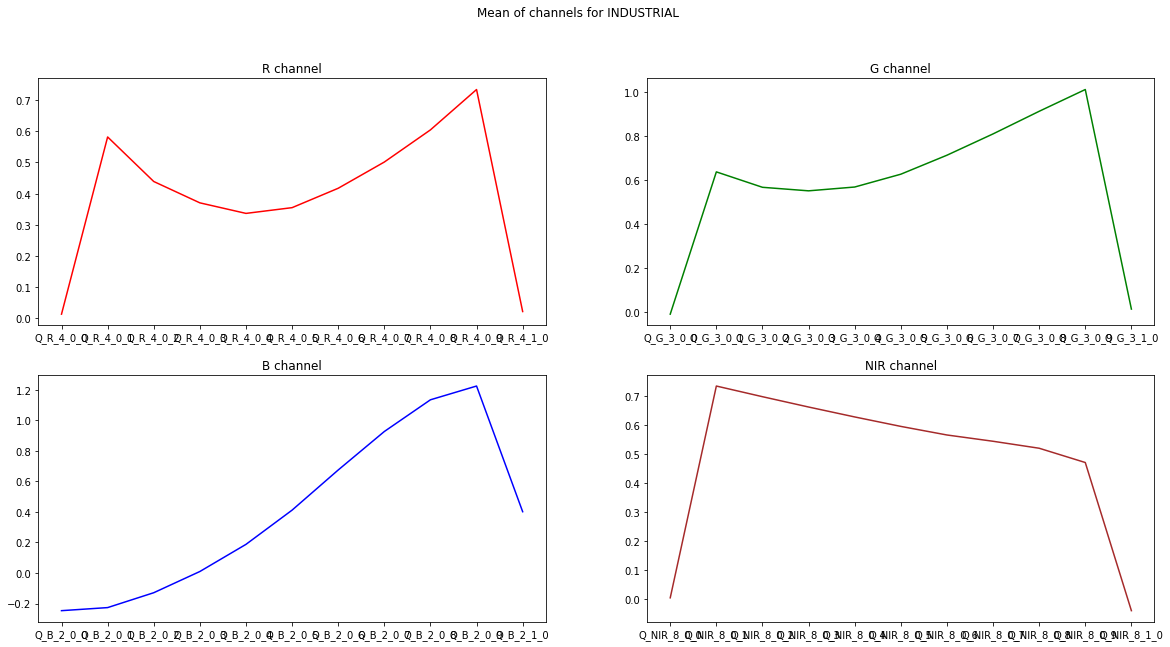

In [199]:
plot_channels("INDUSTRIAL", class_mean)

In [18]:
[[i,np.around(i/10)] for i in range(256)]

[[0, 0.0],
 [1, 0.0],
 [2, 0.0],
 [3, 0.0],
 [4, 0.0],
 [5, 0.0],
 [6, 1.0],
 [7, 1.0],
 [8, 1.0],
 [9, 1.0],
 [10, 1.0],
 [11, 1.0],
 [12, 1.0],
 [13, 1.0],
 [14, 1.0],
 [15, 2.0],
 [16, 2.0],
 [17, 2.0],
 [18, 2.0],
 [19, 2.0],
 [20, 2.0],
 [21, 2.0],
 [22, 2.0],
 [23, 2.0],
 [24, 2.0],
 [25, 2.0],
 [26, 3.0],
 [27, 3.0],
 [28, 3.0],
 [29, 3.0],
 [30, 3.0],
 [31, 3.0],
 [32, 3.0],
 [33, 3.0],
 [34, 3.0],
 [35, 4.0],
 [36, 4.0],
 [37, 4.0],
 [38, 4.0],
 [39, 4.0],
 [40, 4.0],
 [41, 4.0],
 [42, 4.0],
 [43, 4.0],
 [44, 4.0],
 [45, 4.0],
 [46, 5.0],
 [47, 5.0],
 [48, 5.0],
 [49, 5.0],
 [50, 5.0],
 [51, 5.0],
 [52, 5.0],
 [53, 5.0],
 [54, 5.0],
 [55, 6.0],
 [56, 6.0],
 [57, 6.0],
 [58, 6.0],
 [59, 6.0],
 [60, 6.0],
 [61, 6.0],
 [62, 6.0],
 [63, 6.0],
 [64, 6.0],
 [65, 6.0],
 [66, 7.0],
 [67, 7.0],
 [68, 7.0],
 [69, 7.0],
 [70, 7.0],
 [71, 7.0],
 [72, 7.0],
 [73, 7.0],
 [74, 7.0],
 [75, 8.0],
 [76, 8.0],
 [77, 8.0],
 [78, 8.0],
 [79, 8.0],
 [80, 8.0],
 [81, 8.0],
 [82, 8.0],
 [83, 8.0],
 [

ValueError: x and y must be the same size

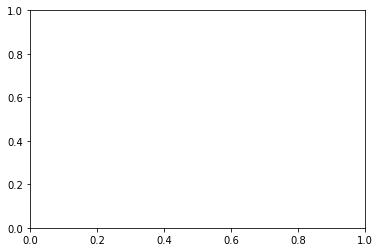

In [14]:
plt.scatter(np.arange(10),np.arange(255))

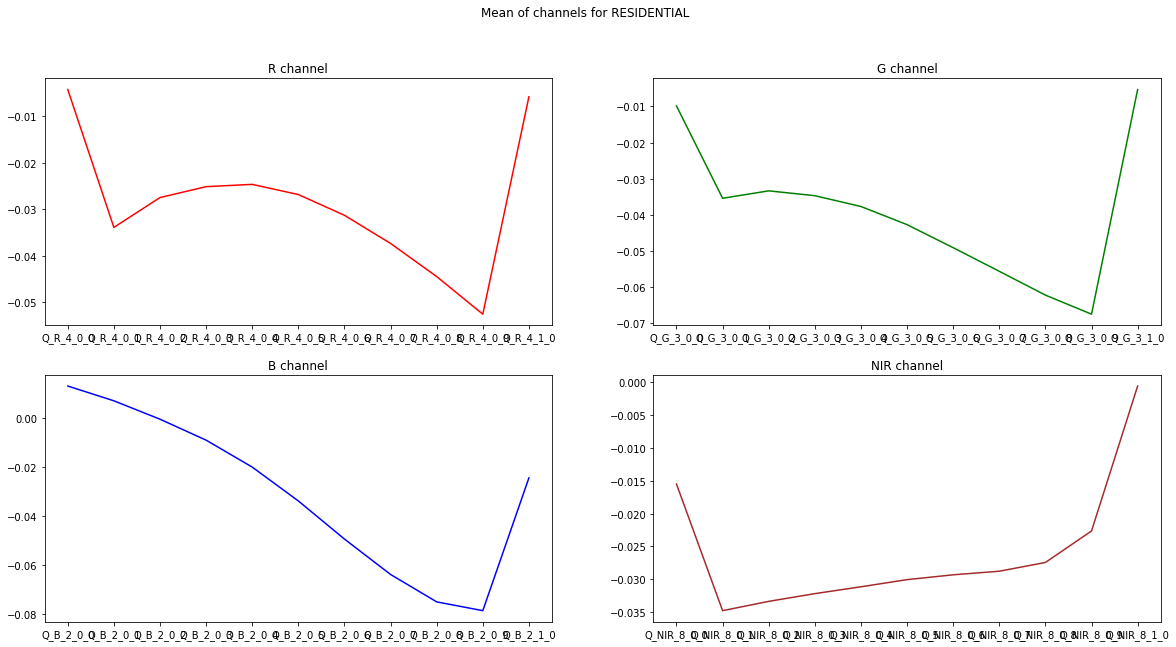

In [214]:
plot_channels("RESIDENTIAL", class_mean)

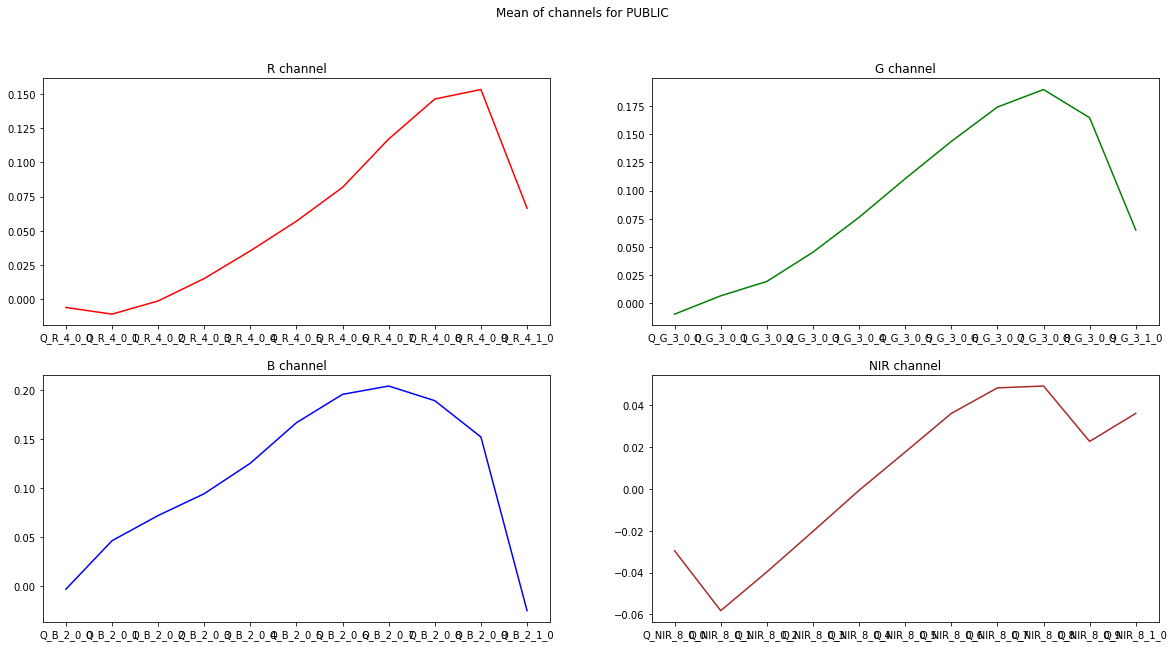

In [215]:
plot_channels("PUBLIC", class_mean)

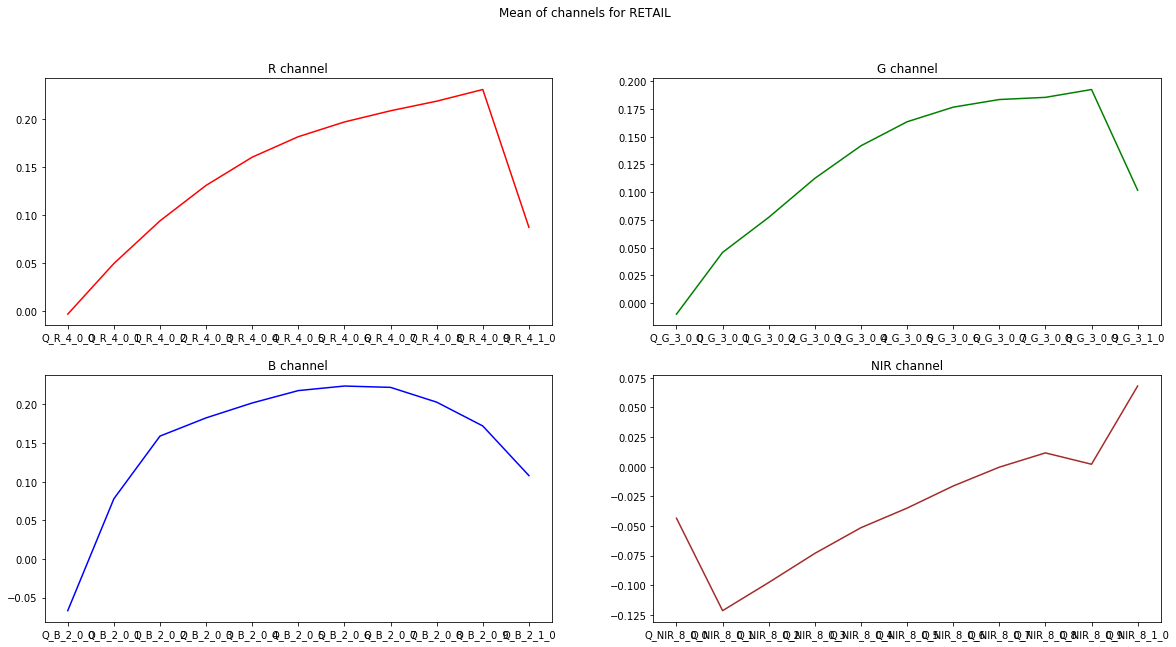

In [216]:
plot_channels("RETAIL", class_mean)

# Coordinates

Change to polar coordinates to see if predictions are more accurate

In [24]:
coor = data[["X", "Y"v, "CLASE"]]


NameError: name 'coo' is not defined

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
coor_norm.head()

,X,Y,CLASE
0,-0.054523,1.592028,RESIDENTIAL
1,-0.694149,-0.648112,RESIDENTIAL
2,1.137074,0.466902,RESIDENTIAL
3,0.664611,1.659663,RESIDENTIAL
4,0.126911,0.422980,RESIDENTIAL


In [57]:
coor.head()

,X,Y,CLASE
0,2207357872,165920300,RESIDENTIAL
1,2189757160,165463267,RESIDENTIAL
2,2240147335,165690752,RESIDENTIAL
3,2227146459,165934099,RESIDENTIAL
4,2212350459,165681791,RESIDENTIAL


In [67]:
c = coor[["X","Y"]]
coor_norm = (c - c.mean())/c.std()
coor_norm["CLASE"] = coor["CLASE"]
classes = coor["CLASE"].unique()
sns.set(style='ticks')

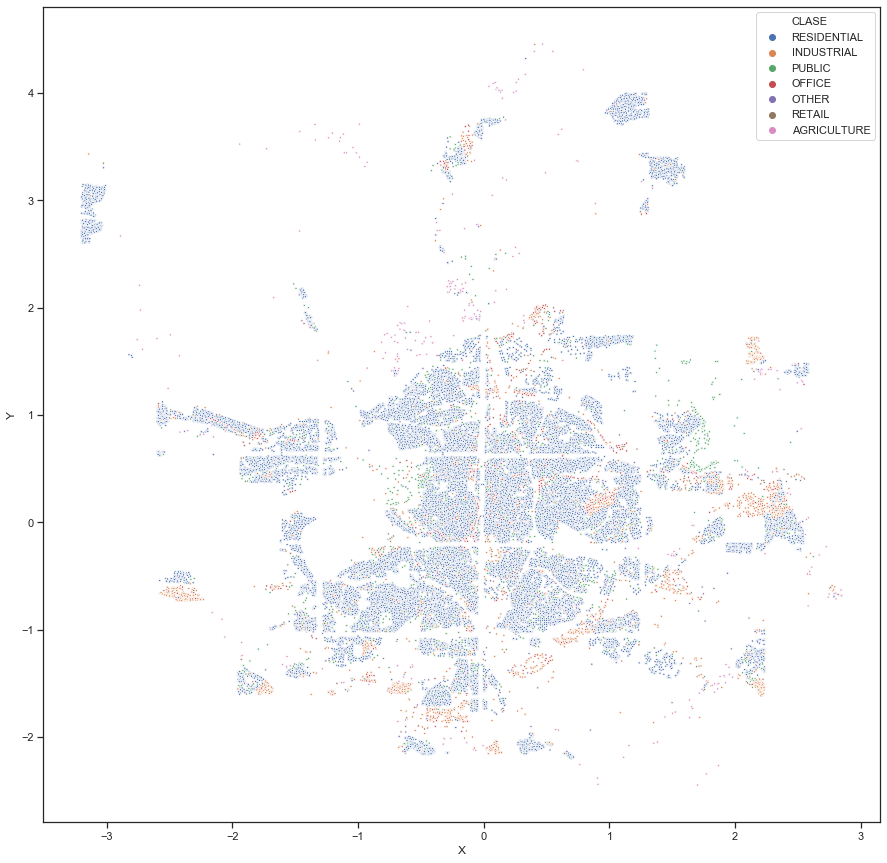

In [68]:
fig, ax = plt.subplots(figsize = (15,15))
fg = sns.scatterplot("X","Y", hue = "CLASE",hue_order= classes, data = coor_norm, ax = ax, s = 5)


In [145]:
data[["X", "Y", "CLASE"]].head()

,X,Y,CLASE
0,2207357872,165920300,RESIDENTIAL
1,2189757160,165463267,RESIDENTIAL
2,2240147335,165690752,RESIDENTIAL
3,2227146459,165934099,RESIDENTIAL
4,2212350459,165681791,RESIDENTIAL


In [ ]:
pd.merge()

In [139]:
estimate_c.head()

,X,Y
0,2200905624,165480229
1,2207436564,165625751
2,2200313961,165752898
3,2199220382,166288192
4,2209143550,165253334


In [71]:
estimate_c = estimate[["X","Y"]]
estimate_coor_norm = (estimate_c - estimate_c.mean())/estimate_c.std()


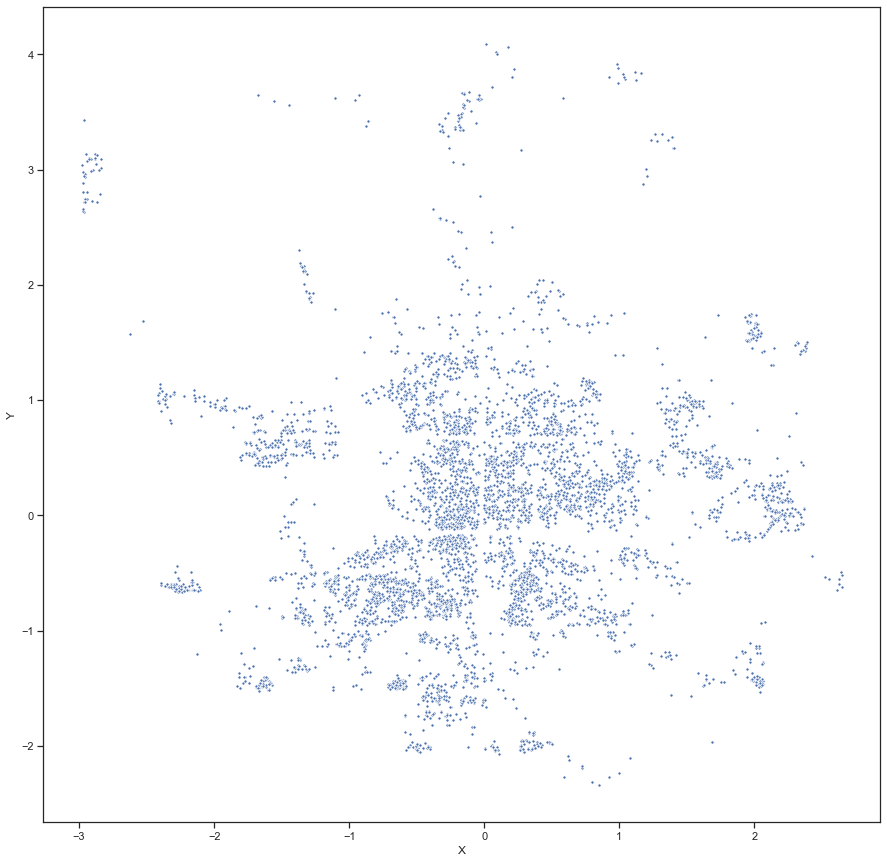

In [73]:
fig_e, ax_e = plt.subplots(figsize = (15,15))
fg = sns.scatterplot("X","Y", data = estimate_coor_norm, ax = ax_e, s = 10)

In [82]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

def normalizer(df):
    return (df - df.mean())/df.std()

In [90]:
train_coor = normalizer(train[["X", "Y"]])
test_coor  =  normalizer(test[["X", "Y"]])
train_coor["CLASE"] = train["CLASE"]
test_coor["CLASE"]  = test["CLASE"]

rho, phi = cart2pol(train_coor["X"],train_coor["Y"])
train_coor["rho"] = rho
train_coor["phi"] = phi

rho, phi = cart2pol(test_coor["X"],test_coor["Y"])
test_coor["rho"] = rho
test_coor["phi"] = phi

In [85]:
train_coor.head()

,X,Y,CLASE,rho,phi
83556,-0.566502,0.981652,RESIDENTIAL,1.133386,2.094200
2308,-3.047601,3.047714,RESIDENTIAL,4.310039,2.356176
53181,0.039953,-0.667077,INDUSTRIAL,0.668273,-1.510975
93021,-0.809156,-0.418494,RESIDENTIAL,0.910973,-2.664281
40335,2.104924,-1.397038,RESIDENTIAL,2.526345,-0.585946


In [87]:
from sklearn.neural_network import MLPClassifier


In [89]:
mlp = MLPClassifier()
mlp.fit(train_coor[["X","Y"]], train_coor["CLASE"])

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [91]:
predictions = mlp.predict(test_coor[["X","Y"]])

In [92]:
from sklearn.metrics import classification_report

In [95]:
report = classification_report(test_coor["CLASE"], predictions, labels = classes)

In [96]:
print(report)

              precision    recall  f1-score   support

 RESIDENTIAL       0.88      1.00      0.94     18026
  INDUSTRIAL       0.77      0.17      0.27       920
      PUBLIC       0.00      0.00      0.00       608
      OFFICE       0.00      0.00      0.00       347
       OTHER       0.00      0.00      0.00       261
      RETAIL       0.00      0.00      0.00       415
 AGRICULTURE       1.00      0.01      0.03        69

    accuracy                           0.88     20646
   macro avg       0.38      0.17      0.18     20646
weighted avg       0.81      0.88      0.83     20646



In [97]:
mlp_polar = MLPClassifier()
mlp_polar.fit(train_coor[["phi","rho"]], train_coor["CLASE"])
predictions_polar = mlp_polar.predict(test_coor[["X","Y"]])

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [98]:
report_polar = classification_report(test_coor["CLASE"], predictions_polar, labels = classes)
print(report_polar)

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

 RESIDENTIAL       0.88      0.55      0.68     18026
  INDUSTRIAL       0.01      0.00      0.00       920
      PUBLIC       0.00      0.00      0.00       608
      OFFICE       0.01      0.23      0.02       347
       OTHER       0.00      0.00      0.00       261
      RETAIL       0.00      0.00      0.00       415
 AGRICULTURE       1.00      0.04      0.08        69

    accuracy                           0.48     20646
   macro avg       0.27      0.12      0.11     20646
weighted avg       0.77      0.48      0.59     20646



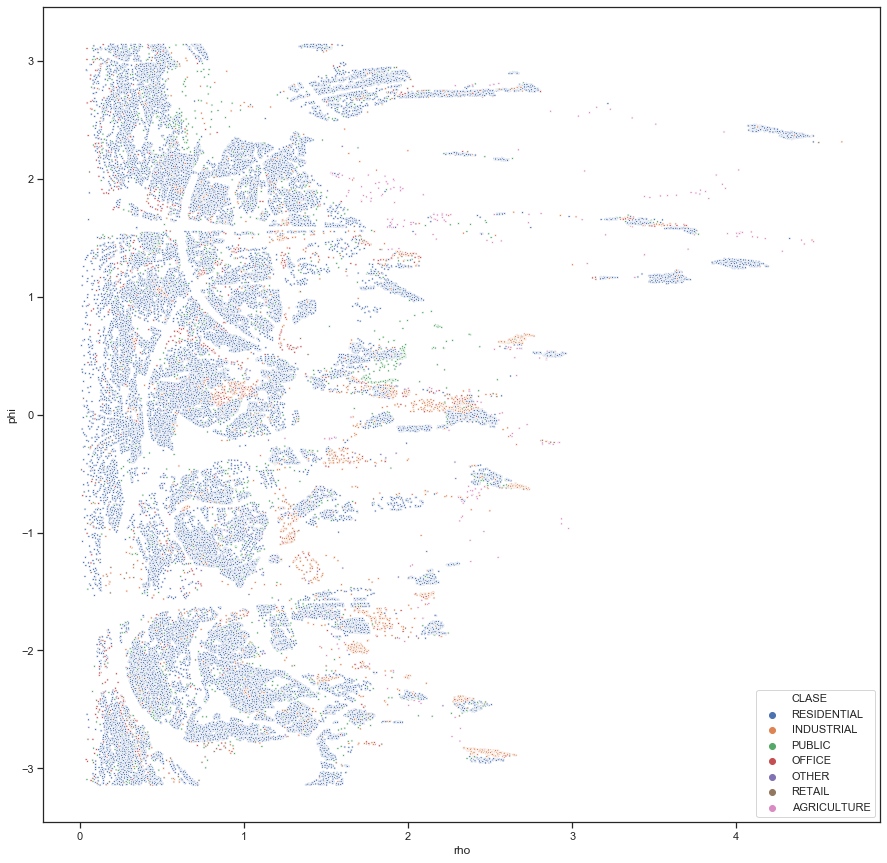

In [99]:
fig, ax = plt.subplots(figsize = (15,15))
fg = sns.scatterplot("rho","phi", hue = "CLASE",hue_order= classes, data = train_coor, ax = ax, s = 5)


In [102]:
a = np.arange(100)

In [132]:
a = np.arange(-1,1,0.05)
coordinates = []
for x in a:
    for y in a:
        coordinates.append([x,y])
c = np.array(coordinates) 

In [111]:
c = np.array(coordinates) - np.array([50,50])

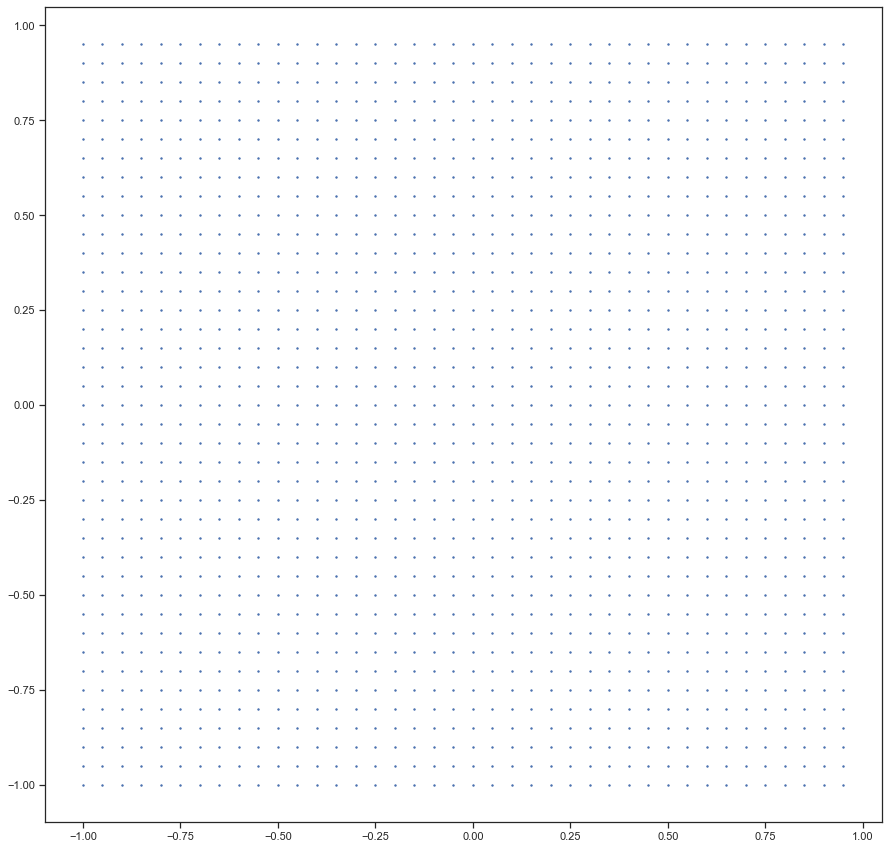

In [133]:
fig, ax = plt.subplots(figsize = (15,15))
plt.scatter(c[:,0],c[:,1], s = 2)

In [134]:
c_pol = np.array(cart2pol(c[:,0],c[:,1])).T

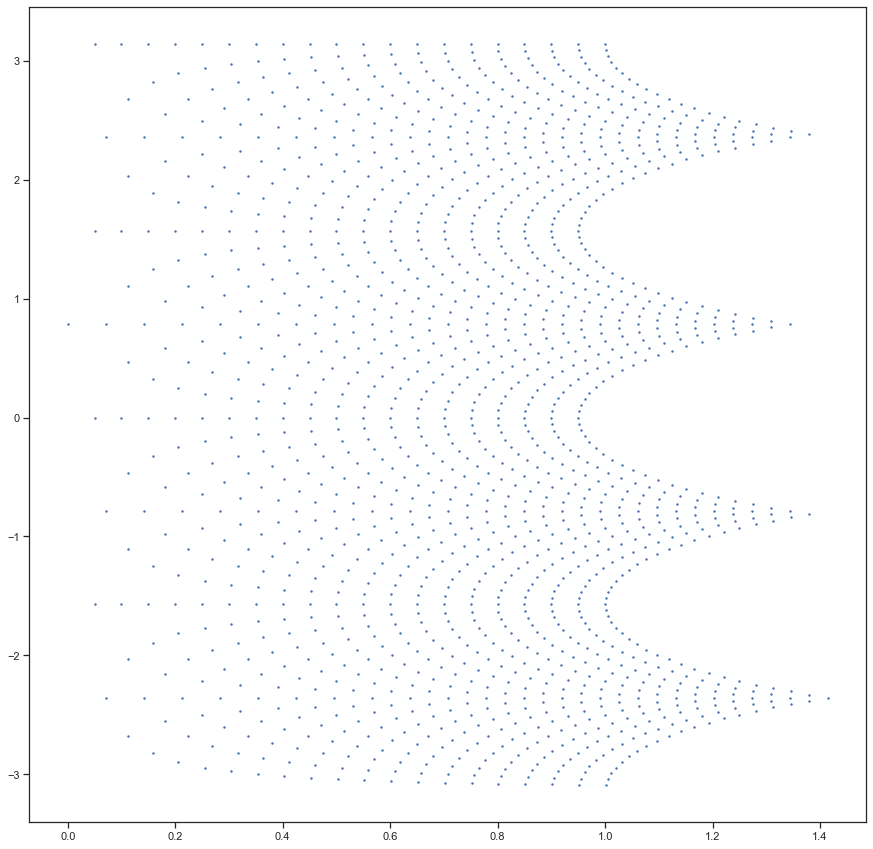

In [135]:
fig, ax = plt.subplots(figsize = (15,15))
plt.scatter(c_pol[:,0],c_pol[:,1], s = 2)

In [118]:
train_coor

,X,Y,CLASE,rho,phi
83556,-0.566502,0.981652,RESIDENTIAL,1.133386,2.094200
2308,-3.047601,3.047714,RESIDENTIAL,4.310039,2.356176
53181,0.039953,-0.667077,INDUSTRIAL,0.668273,-1.510975
93021,-0.809156,-0.418494,RESIDENTIAL,0.910973,-2.664281
40335,2.104924,-1.397038,RESIDENTIAL,2.526345,-0.585946
32569,1.212750,-0.365558,RESIDENTIAL,1.266648,-0.292768
27183,0.701131,0.924129,RESIDENTIAL,1.159999,0.921754
61523,0.016625,-1.689397,RESIDENTIAL,1.689479,-1.560956
41496,-0.277706,-0.340542,RESIDENTIAL,0.439419,-2.254907
16354,0.401171,1.316020,RESIDENTIAL,1.375808,1.274908
